<a href="https://colab.research.google.com/github/petroDavydov/goit-DeepLearningForComputerVisionAndNLP/blob/main/introduction_to_tensors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction to tensors** 🤔
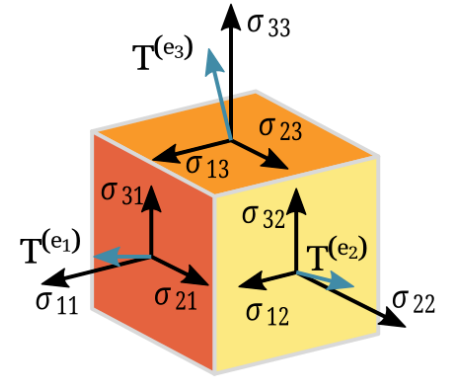

In [ ]:
import torch
import numpy as np


Найпростішим способом створення тензора є виклик torch.empty().

Створений тензор має 3 рядки та 4 стовпці.
Тип повернутого об’єкта – torch.Tensor, який є псевдонімом для torch.FloatTensor.
За замовчуванням тензори PyTorch заповнюються 32-розрядними числами з плаваючою комою.

In [ ]:
x = torch.empty(3, 5)
print(type(x))
print(x)

<class 'torch.Tensor'>
tensor([[2.1707e-18, 7.0952e+22, 1.7748e+28, 1.8176e+31, 7.2708e+31],
        [5.0778e+31, 3.2608e-12, 1.7728e+28, 7.0367e+22, 2.1715e-18],
        [2.1955e-04, 3.3498e-09, 3.3063e-09, 2.6219e-09, 7.9961e+20]])


✅ Найчастіше треба буде ініціалізувати свій тензор певними значенням.
Типовими випадками є всі нулі, усі одиниці або випадкові значення.


In [ ]:
zeros = torch.zeros(2, 3)
print(f"This is torch.zero:\n {zeros}\n")

ones = torch.ones(2, 3)
print(f"This is torch.ones:\n {ones}\n")

torch.manual_seed(1729)
random = torch.rand(2, 3)
print(f"This is torch.rand:\n {random}\n")

This is torch.zero:
 tensor([[0., 0., 0.],
        [0., 0., 0.]])

This is torch.ones:
 tensor([[1., 1., 1.],
        [1., 1., 1.]])

This is torch.rand:
 tensor([[0.3126, 0.3791, 0.3087],
        [0.0736, 0.4216, 0.0691]])



Ініціалізація тензорів, таких як ваги моделі, випадковими значеннями є звичайним явищем, але бувають випадки, особливо в дослідницьких умовах, коли потрібна впевненість у відтворюваності результатів. Це можна зробити,
***встановивши початкове значення генератора випадкових чисел вручну***

In [ ]:
torch.manual_seed(1729)
random1 = torch.rand(2, 3)
print(f"This is random(2,3):\n{random1}\n")

random2 = torch.rand(2, 3)
print(random2)

torch.manual_seed(1729)
random3 = torch.rand(2, 3)
print(random3)

random4 = torch.rand(2, 3)
print(random4)


This is random(2,3):
tensor([[0.3126, 0.3791, 0.3087],
        [0.0736, 0.4216, 0.0691]])

tensor([[0.2332, 0.4047, 0.2162],
        [0.9927, 0.4128, 0.5938]])
tensor([[0.3126, 0.3791, 0.3087],
        [0.0736, 0.4216, 0.0691]])
tensor([[0.2332, 0.4047, 0.2162],
        [0.9927, 0.4128, 0.5938]])


# **Розмірність** тензорів

Для створення тензору, який має таку ж саму кількість вимірів і кількість комірок, як і вже існуюючий тензор,
існують методи **torch.*_like()**:

In [ ]:
x = torch.empty(2, 2, 3)
print(x.shape)
print(x)

empty_like_x = torch.empty_like(x)
print(empty_like_x.shape)
print(empty_like_x)

zeros_like_x = torch.zeros_like(x)
print(zeros_like_x.shape)
print(zeros_like_x)

ones_like_x = torch.ones_like(x)
print(ones_like_x.shape)
print(ones_like_x)

rand_like_x = torch.rand_like(x)
print(rand_like_x.shape)
print(rand_like_x)


torch.Size([2, 2, 3])
tensor([[[1.1600e-31, 0.0000e+00, 1.8665e-31],
         [0.0000e+00, 0.0000e+00, 0.0000e+00]],

        [[0.0000e+00, 0.0000e+00, 1.4013e-45],
         [0.0000e+00, 0.0000e+00, 0.0000e+00]]])
torch.Size([2, 2, 3])
tensor([[[0.0000e+00, 0.0000e+00, 0.0000e+00],
         [0.0000e+00, 0.0000e+00, 0.0000e+00]],

        [[0.0000e+00, 0.0000e+00, 1.4013e-45],
         [0.0000e+00, 0.0000e+00, 0.0000e+00]]])
torch.Size([2, 2, 3])
tensor([[[0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.]]])
torch.Size([2, 2, 3])
tensor([[[1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.]]])
torch.Size([2, 2, 3])
tensor([[[0.6128, 0.1519, 0.0453],
         [0.5035, 0.9978, 0.3884]],

        [[0.6929, 0.1703, 0.1384],
         [0.4759, 0.7481, 0.0361]]])


### Тензори можна створювати безпосередньо з даних. Тип даних визначається автоматично.

In [ ]:
some_constants = torch.tensor([[3.1415926, 2.71828], [1.61803, 0.0072897]])
print(some_constants)

some_integers = torch.tensor((2, 3, 5, 7, 11, 13, 17, 19))
print(some_integers)

more_integers = torch.tensor(((2, 4, 6), [3, 6, 9]))
print(more_integers)


tensor([[3.1416, 2.7183],
        [1.6180, 0.0073]])
tensor([ 2,  3,  5,  7, 11, 13, 17, 19])
tensor([[2, 4, 6],
        [3, 6, 9]])


# Характеристики тензора

---

Типи даних
Встановити тип даних тензора можна кількома способами:

In [ ]:
a = torch.ones((2, 3), dtype=torch.int16)
print(f"torch.ones, dtype=torch.int16: {a}")

b = torch.rand((2, 3), dtype=torch.float64) * 20.
print(f"torch.rand, dtype=torch.float64: {b}")

c = b.to(torch.int64)
print(f"torch.rand.to, dtype=int64: {c}")


torch.ones, dtype=torch.int16: tensor([[1, 1, 1],
        [1, 1, 1]], dtype=torch.int16)
torch.rand, dtype=torch.float64: tensor([[ 0.9956,  1.4148,  5.8364],
        [11.2406, 11.2083, 11.6692]], dtype=torch.float64)
torch.rand.to, dtype=int64: tensor([[ 0,  1,  5],
        [11, 11, 11]])


*Атрибути тензора*

In [ ]:
tensor = torch.rand(3,4)

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")


Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


Доступні типи даних PyTorch включають:\
torch.bool,\
torch.int8, \
orch.uint8,\
torch.int16,\
torch.int32,\
torch.int64,\
torch.half,\
torch.float,\
torch.double,\
torch.bfloat.

# Математика та логіка

базову арифметика та те, як тензори взаємодіють із простими скалярами.

In [ ]:
ones = torch.zeros(2, 2) + 1
twos = torch.ones(2, 2) * 2
threes = (torch.ones(2, 2) * 7 - 1) / 2
fours = twos ** 2
sqrt2s = twos ** 0.5

print(ones)
print(twos)
print(threes)
print(fours)
print(sqrt2s)


tensor([[1., 1.],
        [1., 1.]])
tensor([[2., 2.],
        [2., 2.]])
tensor([[3., 3.],
        [3., 3.]])
tensor([[4., 4.],
        [4., 4.]])
tensor([[1.4142, 1.4142],
        [1.4142, 1.4142]])


Арифметичні операції між тензорами та скалярами, такі як додавання, віднімання, множення, ділення та піднесення до ступеня, розподілені по кожному елементу тензора. Оскільки результатом такої операції буде тензор, можна об’єднати їх разом із звичайними правилами пріоритету операторів, як у рядку, де ми створюємо threes.

In [ ]:
powers2 = twos ** torch.tensor([[1, 2], [3, 4]])
print(powers2)

fives = ones + fours
print(fives)

dozens = threes * fours
print(dozens)


tensor([[ 2.,  4.],
        [ 8., 16.]])
tensor([[5., 5.],
        [5., 5.]])
tensor([[12., 12.],
        [12., 12.]])


спробуємо виконати двійкову операцію над тензорами різної форми.
В нас буде помилка!!!

In [ ]:
# a = torch.rand(2, 3)
# b = torch.rand(3, 2)

# print(a * b)


# **Індексування, нарізка, об’єднання та трансляція тензорів**

Стандартне numpy-подібне індексування та нарізка

In [ ]:
tensor = torch.ones(4, 4)
print(f"First row: {tensor[0]}")
print(f"First column: {tensor[:, 0]}")
print(f"Last column: {tensor[..., -1]}")
tensor[:,1] = 0
print(tensor)


First row: tensor([1., 1., 1., 1.])
First column: tensor([1., 1., 1., 1.])
Last column: tensor([1., 1., 1., 1.])
tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


# Об’єднання тензорів

Для об’єднання послідовності тензорів уздовж заданого виміру можна використати наступні команди:
- *torch.cat* об’єднує послідовність тензорів уздовж виміру, що вже існує:

In [ ]:
x = torch.tensor([[1, 2], [3, 4]])
y = torch.tensor([[5, 6]])
# Конкатенація вздовж 0-го виміру
result = torch.cat((x, y), dim=0)
print(result)


tensor([[1, 2],
        [3, 4],
        [5, 6]])


- torch.stack об’єднує послідовність тензорів у новому вимірі, створюючи новий вимір в отриманому тензорі.

In [ ]:
# x = torch.tensor([[1, 2], [3, 4]])
# y = torch.tensor([[5, 6]])
# # Стек вздовж нового виміру (вимір 0)
# result = torch.stack((x, y), dim=0)
# print(result)

print('(RuntimeError) очікує 2 аргументи')
# ---------------------------------------------------------------------------
# RuntimeError               Traceback (most recent call last)
# Cell In[14], line 4
#    2 y = torch.tensor([[5, 6]])
#    3 # Стек вздовж нового виміру (вимір 0)
# ----> 4 result = torch.stack((x, y), dim=0)
#    5 print(result)

# RuntimeError: stack expects each tensor to be equal size, but got [2, 2] at entry 0 and [1, 2] at entry 1


(RuntimeError) очікує 2 аргументи


# Трансляція тензорів (tensor broadcasting)


Винятком із правила однакових форм є трансляція тензорів:



In [ ]:
rand = torch.rand(2, 4)
doubled = rand * (torch.ones(1, 4) * 2)

print(rand)
print(doubled)


tensor([[0.2024, 0.5731, 0.7191, 0.4067],
        [0.7301, 0.6276, 0.7357, 0.0381]])
tensor([[0.4049, 1.1461, 1.4382, 0.8134],
        [1.4602, 1.2551, 1.4715, 0.0762]])


**Правила трансляції:**
- Кожен тензор повинен мати принаймні один вимір — ніяких порожніх тензорів.

- Порівняння розмірів двох тензорів від останнього до першого:

розміри вимірів мають бути рівними
або

один із вимірів має розмір 1
або

розмірність не існує в одному з тензорів.


In [ ]:
a = torch.ones(4, 3, 2)

b = a * torch.rand(   3, 2) # 3rd & 2nd dims identical to a, dim 1 absent
print(b)

c = a * torch.rand(   3, 1) # 3rd dim = 1, 2nd dim identical to a
print(c)

d = a * torch.rand(   1, 2) # 3rd dim identical to a, 2nd dim = 1
print(d)


tensor([[[0.2138, 0.5395],
         [0.3686, 0.4007],
         [0.7220, 0.8217]],

        [[0.2138, 0.5395],
         [0.3686, 0.4007],
         [0.7220, 0.8217]],

        [[0.2138, 0.5395],
         [0.3686, 0.4007],
         [0.7220, 0.8217]],

        [[0.2138, 0.5395],
         [0.3686, 0.4007],
         [0.7220, 0.8217]]])
tensor([[[0.2612, 0.2612],
         [0.7375, 0.7375],
         [0.8328, 0.8328]],

        [[0.2612, 0.2612],
         [0.7375, 0.7375],
         [0.8328, 0.8328]],

        [[0.2612, 0.2612],
         [0.7375, 0.7375],
         [0.8328, 0.8328]],

        [[0.2612, 0.2612],
         [0.7375, 0.7375],
         [0.8328, 0.8328]]])
tensor([[[0.8444, 0.2941],
         [0.8444, 0.2941],
         [0.8444, 0.2941]],

        [[0.8444, 0.2941],
         [0.8444, 0.2941],
         [0.8444, 0.2941]],

        [[0.8444, 0.2941],
         [0.8444, 0.2941],
         [0.8444, 0.2941]],

        [[0.8444, 0.2941],
         [0.8444, 0.2941],
         [0.8444, 0.2941]]])


# Інші операції з тензорами
Одноелементні тензори. Локальні операції

In [ ]:
agg = tensor.sum()
agg_item = agg.item()
print(agg_item, type(agg_item))


12.0 <class 'float'>


Локальні операції (In-place operations)



In [ ]:
print(f"{tensor} \\n")
tensor.add_(5)
print(tensor)


tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]]) \n
tensor([[6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.]])


# torch.tensor та numpy.array. Операції на GPU

In [ ]:
t = torch.ones(5)
print(f"t: {t}")
n = t.numpy()
print(f"n: {n}")


t: tensor([1., 1., 1., 1., 1.])
n: [1. 1. 1. 1. 1.]


Зміна тензора відображається в масиві NumPy.

In [ ]:
t.add_(1)
print(f"t: {t}")
print(f"n: {n}")


t: tensor([2., 2., 2., 2., 2.])
n: [2. 2. 2. 2. 2.]


Приведення масиву NumPy до tensor



In [ ]:
n = np.ones(5)
t = torch.from_numpy(n)


Зміни в масиві NumPy відображаються в тензорі.



In [ ]:
np.add(n, 1, out=n)
print(f"t: {t}")
print(f"n: {n}")


t: tensor([2., 2., 2., 2., 2.], dtype=torch.float64)
n: [2. 2. 2. 2. 2.]


Виконання операцій на GPU



In [ ]:
# Переносимо наш тензор на графічний процесор (GPU), якщо він доступний
if torch.cuda.is_available():
    tensor = tensor.to("cuda")
    print(tensor)


tensor([[6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.]], device='cuda:0')


In [ ]:
print(torch.cuda.is_available())   # покаже True або False
print(torch.cuda.device_count())   # кількість доступних GPU
print(torch.cuda.get_device_name(0)) if torch.cuda.is_available() else print("No GPU")

True
1
Tesla T4
